In [681]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [682]:
## Import the CSV File
uber=pd.read_csv("/Users/viveksrinivasan/Downloads/Uber Request Data.csv",encoding="ISO-8859-1")
uber.head()

Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47

In [683]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [684]:
## Convert timestamps columns from object to datetime datatype
uber["Request timestamp"]= pd.to_datetime(uber["Request timestamp"],dayfirst=True) 
uber["Drop timestamp"]= pd.to_datetime(uber["Drop timestamp"],dayfirst=True) 
uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  
0 2016-07-11 13:00:00  
1 2016-07-11 18:47:00  
2 2016-07-12 09:58:00  
3 2016-07-12 22:03:00  
4 2016-07-13 09:25:47

In [685]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [686]:
##Extract year,month,day ,hour, from  Request Timestamp.

uber['year'] =uber["Request timestamp"].dt.year
uber['request_month'] =uber["Request timestamp"].dt.month
uber['request_day'] =uber["Request timestamp"].dt.weekday_name
uber['request_hour'] =uber["Request timestamp"].dt.hour
uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  year  request_month request_day  request_hour  
0 2016-07-11 13:00:00  2016              7      Monday            11  
1 2016-07-11 18:47:00  2016              7      Monday            17  
2 2016-07-12 09:58:00  2016              7     Tuesday             9  
3 2016-07-12 22:03:00  2016              7     Tuesday            21  
4 2016-07-13 09:25:47  2016              7   Wednesday             8

In [687]:
## Converting month integer to calendar month
uber['request_month'] = uber['request_month'].apply(lambda x:calendar.month_abbr[x])
uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  year request_month request_day  request_hour  
0 2016-07-11 13:00:00  2016           Jul      Monday            11  
1 2016-07-11 18:47:00  2016           Jul      Monday            17  
2 2016-07-12 09:58:00  2016           Jul     Tuesday             9  
3 2016-07-12 22:03:00  2016           Jul     Tuesday            21  
4 2016-07-13 09:25:47  2016           Jul   Wednesday             8

In [795]:
# Demand at Airport

Demand_Airport=len(uber.loc[(uber['Pickup point'] =='Airport'),:])

Demand_Airport

3238

In [797]:
#Demand at City
Demand_City=len(uber.loc[(uber['Pickup point'] =='City'),:])
Demand_City

3507

In [811]:
# Status of requests at Airport

Airport=uber.loc[(uber['Pickup point'] =='Airport'),:].pivot_table(values=['Pickup point'],index=['Status'],aggfunc='count')

Airport['Percentage']=(Airport['Pickup point']/3238)*100
Airport.sort_values(by='Percentage')

Pickup point  Percentage
Status                                     
Cancelled                   198    6.114886
Trip Completed             1327   40.982088
No Cars Available          1713   52.903027

Text(0,0.5,'Status')

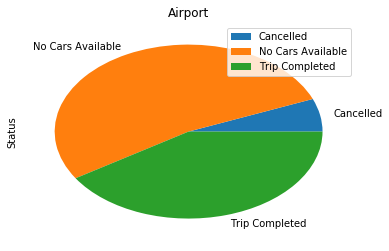

In [812]:
# Plot of status at Airport

Airport.plot.pie(y='Percentage')
plt.title('Airport')
plt.ylabel('Status')

In [753]:
#Status of Request at City

City=uber.loc[(uber['Pickup point'] =='City'),:].pivot_table(values=['Pickup point'],index=['Status'],aggfunc='count')
City['Percentage']=(City['Pickup point']/3507)*100
City.sort_values(by='Percentage')

Pickup point  Percentage
Status                                     
No Cars Available           937   26.717993
Cancelled                  1066   30.396350
Trip Completed             1504   42.885657

Text(0,0.5,'Status')

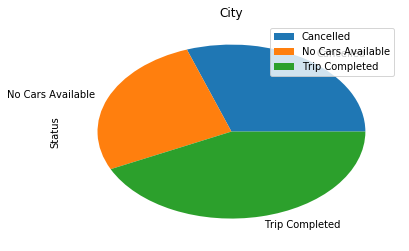

In [813]:
# Plot of Status of Requests at City

City.plot.pie(y='Percentage')
plt.title('City')
plt.ylabel('Status')

In [814]:
## Day Wise Demand from Airport

Demand_Day_Airport=uber.loc[(uber['Pickup point'] =='Airport'),:].pivot_table(values=['Pickup point'],index=['request_day'],aggfunc='count').sort_values(by='Pickup point')
Demand_Day_Airport=Demand_Day_Airport.rename(columns={Demand_Day_Airport.columns[0]:"Demand"})
Demand_Day_Airport

Demand
request_day        
Thursday        601
Friday          629
Monday          661
Wednesday       663
Tuesday         684

In [815]:
## Day Wise Supply at Airport

Supply_airport_day=uber.loc[(uber['Pickup point'] =='Airport'),:].pivot_table(values=['Pickup point'],index=['request_day'],columns='Status',aggfunc='count')

Supply_airport_day

Pickup point                                 
Status         Cancelled No Cars Available Trip Completed
request_day                                              
Friday                31               330            268
Monday                42               338            281
Thursday              32               378            191
Tuesday               45               350            289
Wednesday             48               317            298

In [816]:
## Supply Demand Gap at Airport Day-wise
Supply_Demand_Daywise=pd.merge(Demand_Day_Airport,Supply_airport_day,how='outer',left_index=True,right_index=True).sort_values(by='Demand')

Supply_Demand_Daywise


/Users/viveksrinivasan/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


Demand  (Pickup point, Cancelled)  \
request_day                                      
Thursday        601                         32   
Friday          629                         31   
Monday          661                         42   
Wednesday       663                         48   
Tuesday         684                         45   

             (Pickup point, No Cars Available)  (Pickup point, Trip Completed)  
request_day                                                                     
Thursday                                   378                             191  
Friday                                     330                             268  
Monday                                     338                             281  
Wednesday                                  317                             298  
Tuesday                                    350                             289

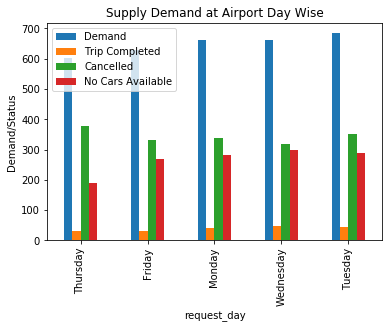

In [817]:
## Supply Demand Plot for Airport Day Wise

Supply_Demand_Daywise.plot(kind='bar',title="Supply Demand at Airport Day Wise")
plt.ylabel('Demand/Status')
plt.legend(['Demand', 'Trip Completed', 'Cancelled','No Cars Available'], loc='upper left')



In [818]:
## Day Wise Demand from City
Demand_Day_City=uber.loc[(uber['Pickup point'] =='City'),:].pivot_table(values=['Pickup point'],index=['request_day'],aggfunc='count').sort_values(by='Pickup point')
Demand_Day_City=Demand_Day_City.rename(columns={Demand_Day_City.columns[0]:"Demand"})
Demand_Day_City

Demand
request_day        
Tuesday         623
Wednesday       674
Monday          706
Friday          752
Thursday        752

In [819]:
## Day Wise Supply at City

Supply_city_day=uber.loc[(uber['Pickup point'] =='City'),:].pivot_table(values=['Pickup point'],index=['request_day'],columns='Status',aggfunc='count')

Supply_city_day

Pickup point                                 
Status         Cancelled No Cars Available Trip Completed
request_day                                              
Friday               209               250            293
Monday               220               166            320
Thursday             220               193            339
Tuesday              195               155            273
Wednesday            222               173            279

In [820]:
## Supply Demand Gap at Airport Day-wise

Supply_Demand_Daywise_City=pd.merge(Demand_Day_City,Supply_city_day,how='outer',left_index=True,right_index=True).sort_values(by='Demand')
Supply_Demand_Daywise_City

/Users/viveksrinivasan/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


Demand  (Pickup point, Cancelled)  \
request_day                                      
Tuesday         623                        195   
Wednesday       674                        222   
Monday          706                        220   
Friday          752                        209   
Thursday        752                        220   

             (Pickup point, No Cars Available)  (Pickup point, Trip Completed)  
request_day                                                                     
Tuesday                                    155                             273  
Wednesday                                  173                             279  
Monday                                     166                             320  
Friday                                     250                             293  
Thursday                                   193                             339

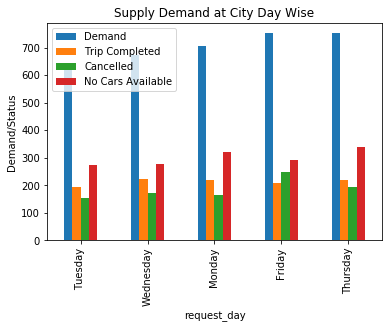

In [821]:
## Supply Demand Plot for City Day Wise

Supply_Demand_Daywise_City.plot(kind='bar',title="Supply Demand at City Day Wise")
plt.ylabel('Demand/Status')
plt.legend(['Demand', 'Trip Completed', 'Cancelled','No Cars Available'], loc='upper left')



In [833]:
##  Day Wise GAP Plotting
Supply_Demand_Gap=uber.loc[(uber['Status'] =='Trip Completed'),:].pivot_table(values='Request id',index=['request_day'],columns='Pickup point',aggfunc='count')
Supply_Demand_Gap


Pickup point  Airport  City
request_day                
Friday            268   293
Monday            281   320
Thursday          191   339
Tuesday           289   273
Wednesday         298   279

In [834]:
Supply_Demand_Gap['Demand_Airport']=Supply_Demand_Daywise['Demand']
Supply_Demand_Gap['% Gap_Airport']=((Supply_Demand_Gap['Demand_Airport']-Supply_Demand_Gap['Airport'])/Supply_Demand_Gap['Demand_Airport'])*100
Supply_Demand_Gap['Demand_City']=Supply_Demand_Daywise_City['Demand']
Supply_Demand_Gap['%Gap_City']=((Supply_Demand_Gap['Demand_City']-Supply_Demand_Gap['City'])/Supply_Demand_Gap['Demand_City'])*100
Supply_Demand_Gap

Pickup point  Airport  City  Demand_Airport  % Gap_Airport  Demand_City  \
request_day                                                               
Friday            268   293             629      57.392687          752   
Monday            281   320             661      57.488654          706   
Thursday          191   339             601      68.219634          752   
Tuesday           289   273             684      57.748538          623   
Wednesday         298   279             663      55.052790          674   

Pickup point  %Gap_City  
request_day              
Friday        61.037234  
Monday        54.674221  
Thursday      54.920213  
Tuesday       56.179775  
Wednesday     58.605341

Text(0,0.5,'Gap at Airport')

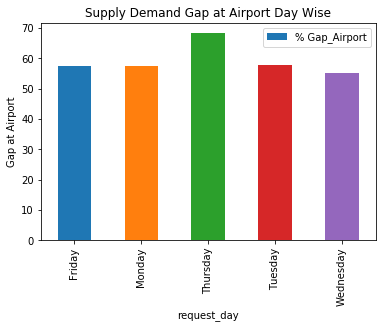

In [835]:
# Day Wise Supply Demand Gap AT Airport

Supply_Demand_Gap.plot(y='% Gap_Airport',kind='bar',title="Supply Demand Gap at Airport Day Wise")
plt.ylabel('Gap at Airport')






Text(0,0.5,'Gap at City')

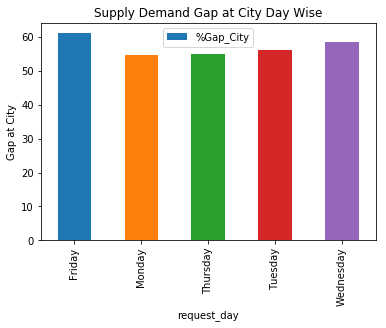

In [836]:
# Daywise Gap Plot for City

Supply_Demand_Gap.plot(y='%Gap_City',kind='bar',title="Supply Demand Gap at City Day Wise")
plt.ylabel('Gap at City')

In [823]:
## Defining Time Slots

uber['time_slot']=uber['request_hour'].apply(lambda x: 'early morning' if x>3 and x<=6 else'morning' if x > 6 and x <=12 else 'afternoon'if  x > 12 and x <=15 else 'evening' if  x > 15 and x <=18 else 'late evening' if x > 18 and x <=20 else 'night')
uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  year request_month request_day  request_hour time_slot  
0 2016-07-11 13:00:00  2016           Jul      Monday            11   morning  
1 2016-07-11 18:47:00  2016           Jul      Monday            17   evening  
2 2016-07-12 09:58:00  2016           Jul     Tuesday             9   morning  
3 2016-07-12 22:03:00  2016           Jul     Tuesday            21     night  
4 2016-07-13 09:25:47  2016           Jul   Wednesday             8   morning

In [824]:
# Demand At Airport Time Slot Wise

Demand_Timeslot_Airport=uber.loc[(uber['Pickup point'] =='Airport'),:].pivot_table(values=['Pickup point'],index=['time_slot'],aggfunc='count').sort_values(by='Pickup point')
Demand_Timeslot_Airport=Demand_Timeslot_Airport.rename(columns={Demand_Timeslot_Airport.columns[0]:"Demand"})
Demand_Timeslot_Airport



Demand
time_slot            
afternoon         191
early morning     253
morning           471
late evening      744
evening           774
night             805

In [825]:
# Supply At Airport Time Slot Wise

Supply_Airport_TimeSlot=uber.loc[(uber['Pickup point'] =='Airport'),:].pivot_table(values=['Pickup point'],index=['time_slot'],columns='Status',aggfunc='count')

Supply_Airport_TimeSlot







Pickup point                                 
Status           Cancelled No Cars Available Trip Completed
time_slot                                                  
afternoon               26                41            124
early morning           10                41            202
evening                 48               533            193
late evening            44               543            157
morning                 39                51            381
night                   31               504            270

In [826]:
# Supply Demand at Airport Time Slot Wise

Supply_Demand_Timeslotwise_Airport=pd.merge(Demand_Timeslot_Airport,Supply_Airport_TimeSlot,how='outer',left_index=True,right_index=True).sort_values(by='Demand')

Supply_Demand_Timeslotwise_Airport



/Users/viveksrinivasan/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


Demand  (Pickup point, Cancelled)  \
time_slot                                          
afternoon         191                         26   
early morning     253                         10   
morning           471                         39   
late evening      744                         44   
evening           774                         48   
night             805                         31   

               (Pickup point, No Cars Available)  \
time_slot                                          
afternoon                                     41   
early morning                                 41   
morning                                       51   
late evening                                 543   
evening                                      533   
night                                        504   

               (Pickup point, Trip Completed)  
time_slot                                      
afternoon                                 124  
early morning                             202  
morning                                   381  
late evening                              157  
evening                                   193  
night                                     270

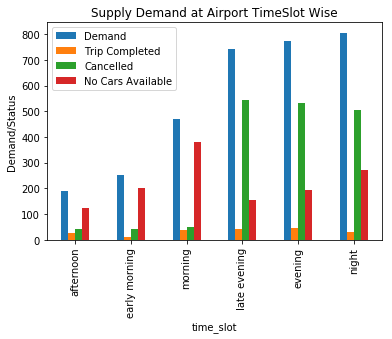

In [827]:
## Supply Demand Plot for Airport Time Slot Wise

Supply_Demand_Timeslotwise_Airport.plot(kind='bar',title="Supply Demand at Airport TimeSlot Wise")
plt.ylabel('Demand/Status')
plt.legend(['Demand', 'Trip Completed', 'Cancelled','No Cars Available'], loc='upper left')

In [768]:
# Demand At City Time Slot Wise

Demand_Timeslot_City=uber.loc[(uber['Pickup point'] =='City'),:].pivot_table(values=['Pickup point'],index=['time_slot'],aggfunc='count').sort_values(by='Pickup point')
Demand_Timeslot_City=Demand_Timeslot_City.rename(columns={Demand_Timeslot_City.columns[0]:"Demand"})
Demand_Timeslot_City

Demand
time_slot            
late evening      221
afternoon         276
evening           313
night             517
early morning     793
morning          1387

In [769]:
# Supply At City Time Slot Wise

Supply_City_TimeSlot=uber.loc[(uber['Pickup point'] =='City'),:].pivot_table(values=['Pickup point'],index=['time_slot'],columns='Status',aggfunc='count')

Supply_City_TimeSlot


Pickup point                                 
Status           Cancelled No Cars Available Trip Completed
time_slot                                                  
afternoon               24                97            155
early morning          362               203            228
evening                 33                67            213
late evening            21                30            170
morning                579               335            473
night                   47               205            265

In [770]:
# Supply Demand at City Time Slot Wise

Supply_Demand_Timeslotwise_City=pd.merge(Demand_Timeslot_City,Supply_City_TimeSlot,how='outer',left_index=True,right_index=True).sort_values(by='Demand')

Supply_Demand_Timeslotwise_City


/Users/viveksrinivasan/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


Demand  (Pickup point, Cancelled)  \
time_slot                                          
late evening      221                         21   
afternoon         276                         24   
evening           313                         33   
night             517                         47   
early morning     793                        362   
morning          1387                        579   

               (Pickup point, No Cars Available)  \
time_slot                                          
late evening                                  30   
afternoon                                     97   
evening                                       67   
night                                        205   
early morning                                203   
morning                                      335   

               (Pickup point, Trip Completed)  
time_slot                                      
late evening                              170  
afternoon                                 155  
evening                                   213  
night                                     265  
early morning                             228  
morning                                   473

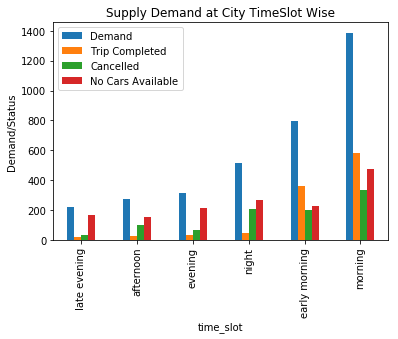

In [844]:
## Supply Demand Plot for City Time Slot Wise

Supply_Demand_Timeslotwise_City.plot(kind='bar',title="Supply Demand at City TimeSlot Wise")
plt.ylabel('Demand/Status')
plt.legend(['Demand', 'Trip Completed', 'Cancelled','No Cars Available'], loc='upper left')

In [845]:
# Time Slot Wise Gap

Supply_Demand_Gap_time=uber.loc[(uber['Status'] =='Trip Completed'),:].pivot_table(values='Request id',index=['time_slot'],columns='Pickup point',aggfunc='count')
Supply_Demand_Gap_time

Pickup point   Airport  City
time_slot                   
afternoon          124   155
early morning      202   228
evening            193   213
late evening       157   170
morning            381   473
night              270   265

In [846]:
Supply_Demand_Gap_time['Demand_Airport']=Demand_Timeslot_Airport['Demand']
Supply_Demand_Gap_time['% Gap_Airport']=((Supply_Demand_Gap_time['Demand_Airport']-Supply_Demand_Gap_time['Airport'])/Supply_Demand_Gap_time['Demand_Airport'])*100
Supply_Demand_Gap_time['Demand_City']=Demand_Timeslot_City['Demand']
Supply_Demand_Gap_time['%Gap_City']=((Supply_Demand_Gap_time['Demand_City']-Supply_Demand_Gap_time['City'])/Supply_Demand_Gap_time['Demand_City'])*100
Supply_Demand_Gap_time

Pickup point   Airport  City  Demand_Airport  % Gap_Airport  Demand_City  \
time_slot                                                                  
afternoon          124   155             191      35.078534          276   
early morning      202   228             253      20.158103          793   
evening            193   213             774      75.064599          313   
late evening       157   170             744      78.897849          221   
morning            381   473             471      19.108280         1387   
night              270   265             805      66.459627          517   

Pickup point   %Gap_City  
time_slot                 
afternoon      43.840580  
early morning  71.248424  
evening        31.948882  
late evening   23.076923  
morning        65.897621  
night          48.742747

Text(0,0.5,'Gap at Airport')

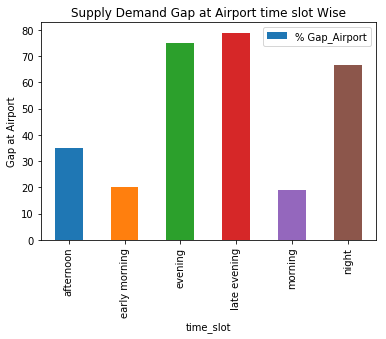

In [847]:
# Time Slot Wise Gap at Airport

Supply_Demand_Gap_time.plot(y='% Gap_Airport',kind='bar',title="Supply Demand Gap at Airport time slot Wise")
plt.ylabel('Gap at Airport')

Text(0,0.5,'Gap at City')

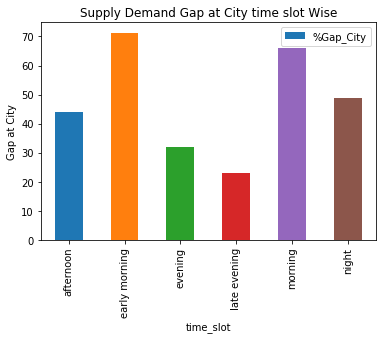

In [849]:
# Time Slot Wise Gap at City

Supply_Demand_Gap_time.plot(y='%Gap_City',kind='bar',title="Supply Demand Gap at City time slot Wise")
plt.ylabel('Gap at City')